In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("davis.csv")
display(df)

,Time,Temp (C),Gas (Ohm),Humidity (%),PM 1.0: %d,PM 2.5: %d,PM 10: %d
0,1.740615e+09,34.902852,5329,100.000000,0,0,0
1,1.740615e+09,24.339375,1585,38.773532,0,1,1
2,1.740615e+09,24.397773,3133,38.680099,0,1,1
3,1.740615e+09,24.461250,4649,38.446903,0,1,1
4,1.740615e+09,24.521602,6159,38.126164,0,1,1
...,...,...,...,...,...,...,...
295,1.740616e+09,25.118477,129444,31.641611,0,0,0
296,1.740616e+09,25.122578,129744,31.647569,0,0,0
297,1.740616e+09,25.124336,129544,31.630944,0,0,0
298,1.740616e+09,25.124336,130452,31.625351,0,0,0


In [4]:
df.columns = ["Time", "Temperature", "Gas_Ohm", "Humidity", "PM1.0", "PM2.5", "PM10"]

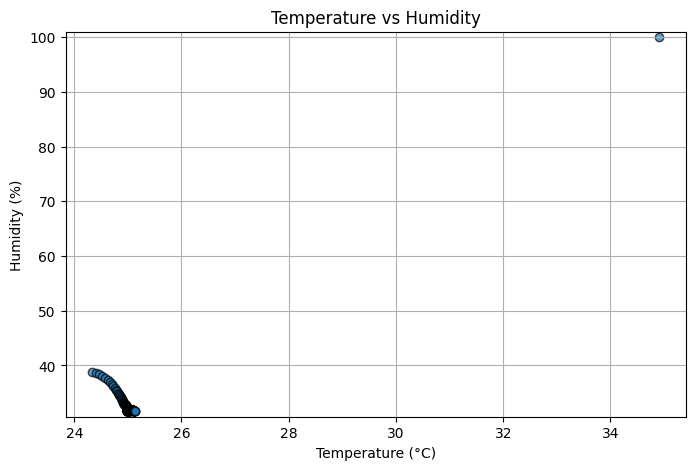

In [5]:
#### plot showing all the data points

plt.figure(figsize=(8, 5))
plt.scatter(df["Temperature"], df["Humidity"], alpha=0.7, marker="o", edgecolors="black")
# Set x-axis and y-axis limits to include all data
plt.xlim(df["Temperature"].min() - 0.5, df["Temperature"].max() + 0.5)
plt.ylim(df["Humidity"].min() - 1, df["Humidity"].max() + 1)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity")
plt.grid(True)  # Optional: add grid for better readability

plt.show()

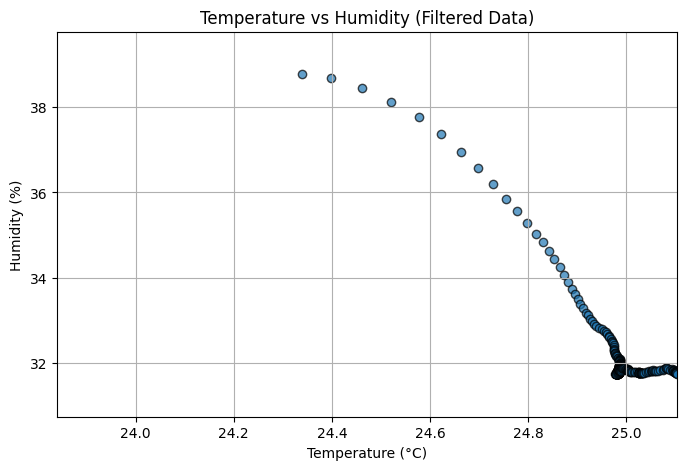

In [6]:
#### plot showing 95th percentile (reliable data)
# Dynamically determine the max temperature threshold (e.g., 95th percentile)
max_temp_threshold = df["Temperature"].quantile(0.95)  # Adjusts dynamically

# Filter data to exclude unreliable high-temperature readings
df_filtered = df[df["Temperature"] <= max_temp_threshold]

# Plot Temperature vs. Humidity using matplotlib
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered["Temperature"], df_filtered["Humidity"], alpha=0.7, marker="o", edgecolors="black")

# Set x-axis and y-axis limits
plt.xlim(df_filtered["Temperature"].min() - 0.5, max_temp_threshold)  # Dynamically set upper x-axis limit
plt.ylim(df_filtered["Humidity"].min() - 1, df_filtered["Humidity"].max() + 1)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity (Filtered Data)")
plt.grid(True)  # Optional: add grid for better readability

plt.show()

### <u>**What is the hidden variable that is important when making plots like this?**</u>

Hidden Variable: Absolute Humidity

Relative humidity (RH) depends on temperature, but absolute humidity (AH), the actual amount of water vapor per cubic meter, is more stable.

### <u>**What does this plot show? Are temperature and humidity correlated? How would you quantify this?**</u>

The plot shows a **negative correlation** between temperature and humidity, meaning that as temperature increases, humidity tends to decrease. This relationship can be quantified using the Pearson correlation coefficient or **linear regression (R² value)** to measure the strength and linearity of the correlation. Below is the code to compute them:

In [8]:
from scipy.stats import pearsonr, linregress

In [9]:
corr, _ = pearsonr(df_filtered["Temperature"], df_filtered["Humidity"])
slope, intercept, r_value, p_value, std_err = linregress(df_filtered["Temperature"], df_filtered["Humidity"])
r_squared = r_value**2

print(f"Pearson Correlation: {corr:.3f}")
print(f"Linear R² Value: {r_squared:.3f}")

Pearson Correlation: -0.926
Linear R² Value: 0.857


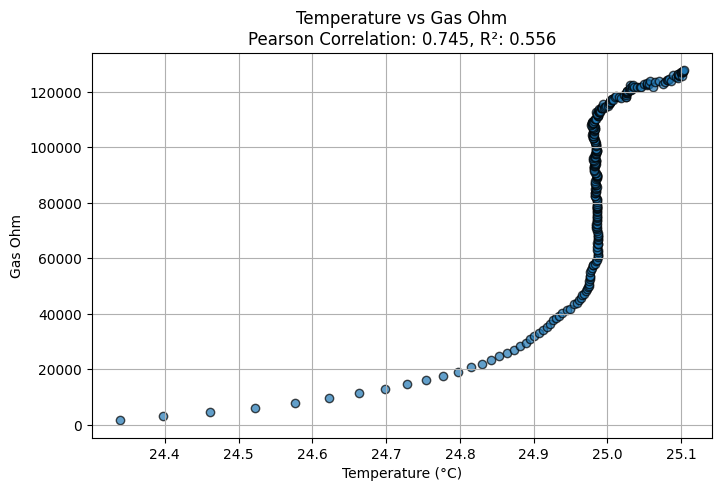

/var/folders/1j/t5thg2bd4hz3q2m81t8wyygm0000gn/T/ipykernel_75019/2682462788.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(df_filtered["Temperature"], df_filtered[prop])


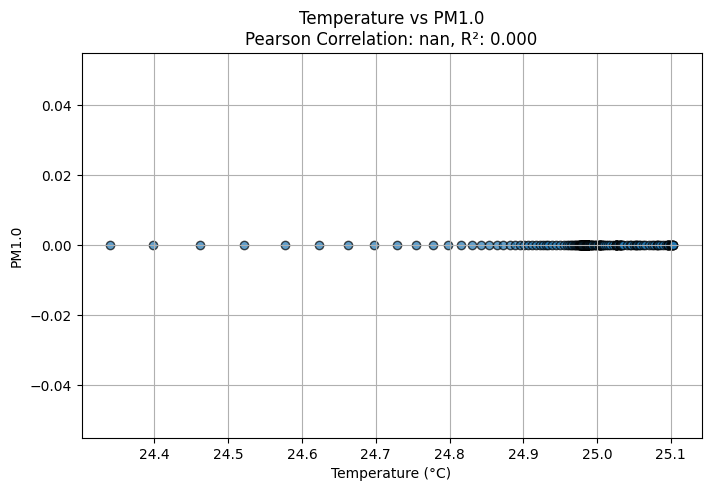

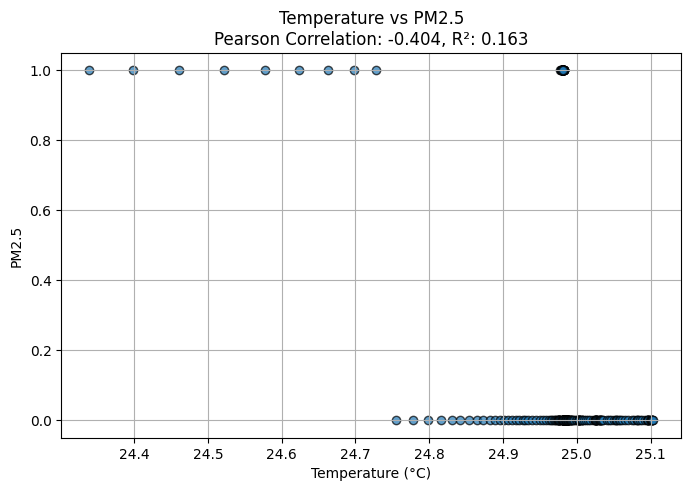

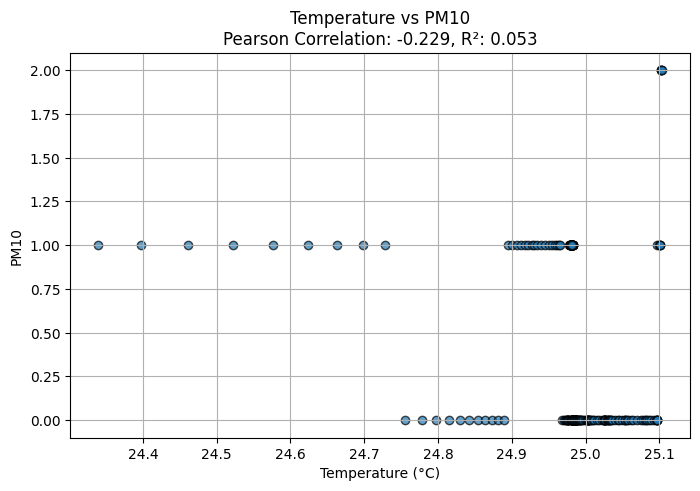

In [10]:
###temperature vs. other properties

max_temp_threshold = df["Temperature"].quantile(0.95)  # Adjusts dynamically

# Filter data to exclude unreliable high-temperature readings
df_filtered = df[df["Temperature"] <= max_temp_threshold]

# List of properties to compare with temperature (excluding time)
properties = ["Gas_Ohm", "PM1.0", "PM2.5", "PM10"]
correlation_results = {}

# Generate scatter plots and compute correlation for each property
for prop in properties:
    plt.figure(figsize=(8, 5))
    plt.scatter(df_filtered["Temperature"], df_filtered[prop], alpha=0.7, marker="o", edgecolors="black")
    
    # Compute Pearson correlation coefficient
    try:
        corr, _ = pearsonr(df_filtered["Temperature"], df_filtered[prop])
    except:
        corr = float('nan')  # Handle cases where correlation is undefined (constant values)

    correlation_results[prop] = corr
    
    # Compute linear regression R² value
    slope, intercept, r_value, p_value, std_err = linregress(df_filtered["Temperature"], df_filtered[prop])
    r_squared = r_value**2

    plt.xlabel("Temperature (°C)")
    plt.ylabel(prop.replace("_", " "))  # Format label
    plt.title(f"Temperature vs {prop.replace('_', ' ')}\nPearson Correlation: {corr:.3f}, R²: {r_squared:.3f}")
    plt.grid(True)
    
    plt.show()

In [11]:
print("Correlation Results:")
for prop, corr in correlation_results.items():
    print(f"Temperature vs {prop}: Pearson Correlation = {corr:.3f}")

Correlation Results:
Temperature vs Gas_Ohm: Pearson Correlation = 0.745
Temperature vs PM1.0: Pearson Correlation = nan
Temperature vs PM2.5: Pearson Correlation = -0.404
Temperature vs PM10: Pearson Correlation = -0.229


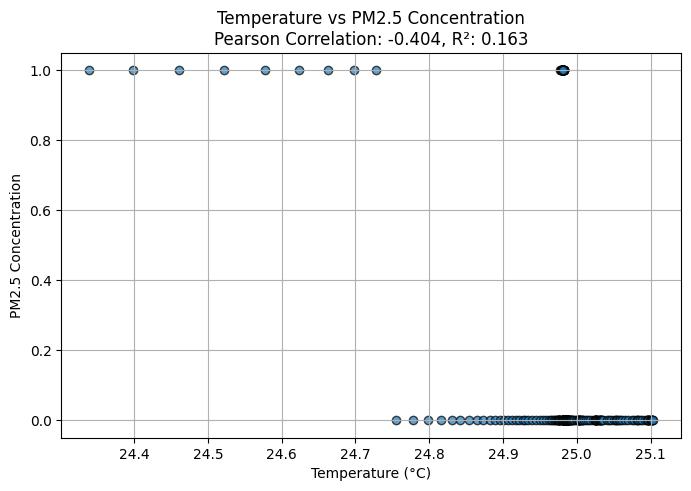

In [12]:
#### temperature vs. PM2.5 concentration (plotted in previous part but doing it again for clarity)

plt.figure(figsize=(8, 5))
plt.scatter(df_filtered["Temperature"], df_filtered["PM2.5"], alpha=0.7, marker="o", edgecolors="black")

# Compute Pearson correlation coefficient for Temperature vs PM2.5
corr_pm25, _ = pearsonr(df_filtered["Temperature"], df_filtered["PM2.5"])

# Compute linear regression R² value
slope, intercept, r_value, p_value, std_err = linregress(df_filtered["Temperature"], df_filtered["PM2.5"])
r_squared_pm25 = r_value**2

# Set plot labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Concentration")
plt.title(f"Temperature vs PM2.5 Concentration\nPearson Correlation: {corr_pm25:.3f}, R²: {r_squared_pm25:.3f}")
plt.grid(True)

plt.show()

Pearson correlation is -0.404 which suggests a weak negative correlation, meaning as the temperature increases, PM 2.5 tends to decrease slightly.
Qualitatively different from temperature vs. humidity, which had a strong negative correlation.
linear regression R^2 value shows low predictive power, meaning other factors affect PM 2.5 levels beyond temperature alone.